# Exercise 1. Dynamical Systems Theory in Machine Learning & Data Science
# Name:- Kaushal Kumar ( Email:- kaushal.kumar@stud.uni-heidelberg.de )

Remark: I am submitting this exercise group individually. 

# Task 1. A simple SIR model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
N=1000 # total population

# initial conditions : one infected, rest susceptible
I0=1
R0=0
S0= N-I0-R0 

# parameter
beta=2.4
gamma=1.0/20

# time points (days)
t=np.linspace(0,199,200)  ## Grid of time points (in days)

In [3]:
# SIR diff equ

def SIR(y,t,N,beta,gamma):
    S,I,R= y
    dSdt= -beta*S*I/N
    dIdt= beta*S*I/N -gamma*I
    dRdt= gamma*I
    return dSdt, dIdt, dRdt

In [4]:
# initial condition vector
y0= S0, I0, R0

# Integrate the SIR model over the time grid, t.

sol=odeint(SIR, y0, t, args=(N,beta,gamma))
S,I,R =sol.T

1. Plot for the time evolution untill the dynamics run into a fixed point

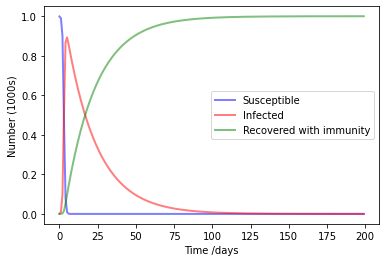

In [5]:
# Plot the data on three separate curves for S(t), I(t) and R(t)

plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Time /days')
plt.ylabel('Number (1000s)')
plt.legend()
plt.show()

In [6]:
# Determine fixed point for this systems
import sympy as sm
S,I,R=sm.symbols('S,I,R')
P=-2.4*S*I/1000
Q=2.4*S*I/1000 -(1/20)*I
K=I*1.0/20

# set P(S,I,R)=0 , Q(S,I,R)=0 and K(S,I,R)=0

Peqn=sm.Eq(P,0)
Qeqn=sm.Eq(Q,0)
Keqn=sm.Eq(K,0)
criticalpoints=sm.solve((Peqn,Qeqn,Keqn),S,I,R)
print(criticalpoints)

[(S, 0.0, R)]


In [7]:
# SIRD diff equ
def SIRD(y,t,N,beta,gamma,mu):
    S,I,R,D= y
    dSdt= -beta*S*I/N
    dIdt= beta*S*I/N -gamma*I -mu*I
    dRdt= gamma*I
    dDdt= mu*I
    return dSdt, dIdt, dRdt, dDdt

In [8]:
N = 1000
beta=2.4
gamma=1.0/20
mu= 0.01 # mortality rate
# 60 percentage of the total population are susceptible to infection initially.
S0, I0, R0, D0 =N-I0-R0, 1, 0, 0  # initial conditions: one exposed

# time points (days)
t=np.linspace(0,199,200)  ## Grid of time points (in days)

In [9]:
# initial condition vector
y0= S0, I0, R0, D0

# Integrate the SIR model over the time grid, t.

sol=odeint(SIRD, y0, t, args=(N,beta,gamma,mu))
S,I,R,D =sol.T

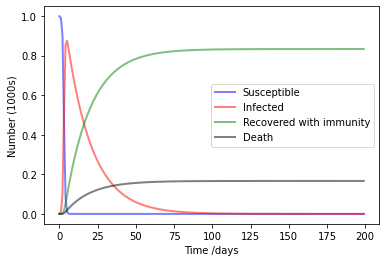

In [10]:
# Plot the data on three separate curves for S(t), I(t) and R(t), D(t)

plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.plot(t, D/1000, 'k', alpha=0.5, lw=2, label='Death')
plt.xlabel('Time /days')
plt.ylabel('Number (1000s)')
plt.legend()
plt.show()

# Task 4. Flow field of linear ODEs

Solution 4.1 (fixed point)

In [11]:
# Determine fixed point for this systems
import sympy as sm
x1,x2=sm.symbols('x1,x2')
P=0.1*x1-0.3*x2
Q=0.2*x1-0.3*x2

# set P(x1,x2)=0 and Q(x1,x2)=0.

Peqn=sm.Eq(P,0)
Qeqn=sm.Eq(Q,0)
criticalpoints=sm.solve((Peqn,Qeqn),x1,x2)
print(criticalpoints)

{x1: 0.0, x2: 0.0}


Note: I have attached the solution for fixed point calculated manually.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

In [13]:
# Linear ODEs
def dx_dt(x,t):
    return [0.1*x[0]-0.3*x[1], 0.2*x[0]-0.3*x[1]]

Solution: 4.2. (time evolution for the system)

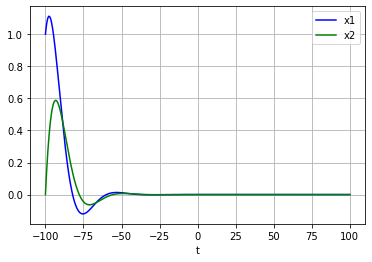

In [14]:
# Trajectories 
t = np.linspace(-100,100,1000)

# Initial conditions
x0=[1,0]

sol=odeint(dx_dt,x0,t)


plt.plot(t, sol[:, 0], 'b', label='x1')
plt.plot(t, sol[:, 1], 'g', label='x2')
plt.legend()
plt.xlabel('t')
plt.grid()
plt.show()

Above plot is the time evolution of the system for a given initial vector 

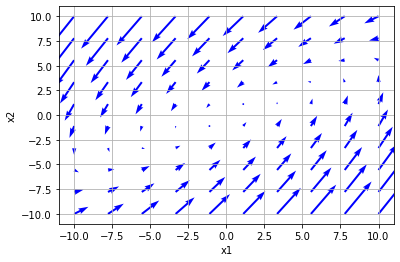

In [15]:
# Plot the flow field.
X,Y = np.mgrid[-10:10:10j, -10:10:10j]
x1 = 0.1*X -0.3*Y
x2= 0.2*X -0.3*Y
pl.quiver(X, Y, x1, x2, color = 'b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

Above plot is the Flow field of the given system (solution 4.3)

Since the the trajectories spiral counterclockwise around the origin. Hence the fixed point (0,0) is called the stable focus.  

(solution 4.4)

Different types of dynamics with own choice of parameter.

$\dot{X}=A.X$, where $A= \begin{vmatrix}a&b\\c & d \end{vmatrix}$ and $X=\begin{vmatrix}x1 \\ x2\end{vmatrix}$.

In [16]:
# Phase portrait with Field flow

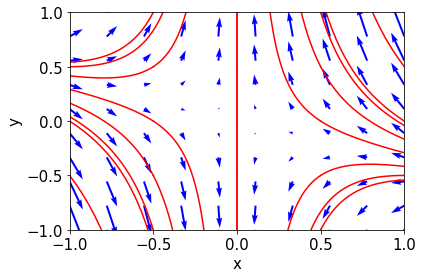

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

# The 2-dimensional linear system.
a, b, c, d = -1, 0, 1, 2 # parameter of the system

def dx_dt(x, t):
 return [a*x[0] + b*x[1], c*x[0] + d*x[1]]

# Trajectories in forward time.
ts = np.linspace(0, 4, 100)
ic = np.linspace(-1, 1, 5)
for r in ic:
    for s in ic:
        x0 = [r, s]
        xs = odeint(dx_dt, x0, ts)
        plt.plot(xs[:,0], xs[:,1], "r-")
        
# Trajectories in backward time.
ts = np.linspace(0, -4, 100)
ic = np.linspace(-1, 1, 5)
for r in ic:
    for s in ic:
        x0 = [r, s]
        xs = odeint(dx_dt, x0, ts)
        plt.plot(xs[:,0], xs[:,1], "r-")
        
# Label the axes and set fontsizes.
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(-1, 1)
plt.ylim(-1, 1);


# Plot the Field flow
X,Y = np.mgrid[-1:1:10j, -1:1:10j]
u = a*X + b*Y
v = c*X + d*Y
pl.quiver(X, Y, u, v, color = 'b')
plt.show()

Above plot, fixed point (0,0) is the saddle point.

Note: Along with this jupyter notebook, hand written solution is also attached together